In [184]:
import torch
from simple_vae import VAE, Encoder, Decoder
from torchvision import datasets, transforms
from utils.utils import show_image_grid, load_config
import matplotlib.pyplot as plt

## Load data and model

In [185]:
args = load_config("config.yaml")

input_dim = args.input_dim
hidden_dim = args.hidden_dim
z_dim = args.z_dim
bs = args.batch_size
n_epochs = args.n_epochs
save_dir = args.save_dir
log_interval = args.log_interval
val_interval_epoch = args.val_interval_epoch

In [186]:
    
encoder = Encoder(input_dim, hidden_dim, z_dim)
decoder = Decoder(z_dim, hidden_dim, input_dim)
vae = VAE(encoder, decoder)

ckpt = torch.load(r"out_logs\model_9379.pt", weights_only=True)
vae.load_state_dict(ckpt['model'])

<All keys matched successfully>

In [187]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)) # calculated mean and std 
    ])

test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

## Reconstruction

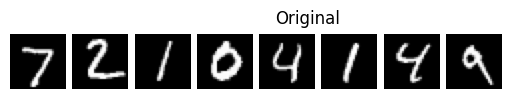

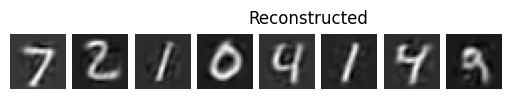

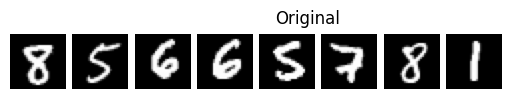

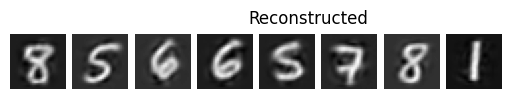

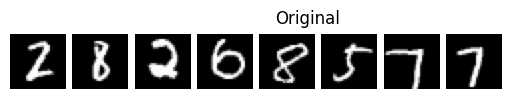

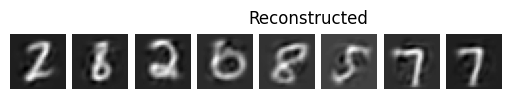

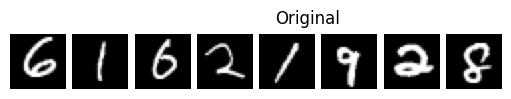

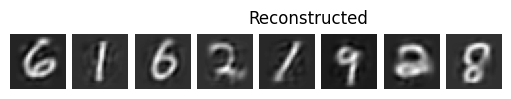

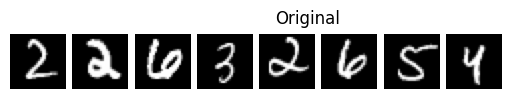

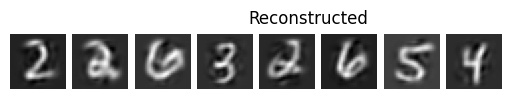

In [188]:
vae.eval()
with torch.no_grad():
    for i, (data, labels) in enumerate(test_loader):
        data = data.view(-1, input_dim)
        recon_batch, mu, logvar = vae(data)
        fig = show_image_grid(data.view(-1, 28, 28))
        fig.suptitle("Original", y = 1.1)
        plt.show()
        fig = show_image_grid(recon_batch.view(-1, 28, 28))
        fig.suptitle("Reconstructed", y = 1.1)
        plt.show()
        if i == 4:
            break
    

## Generation from standard normal

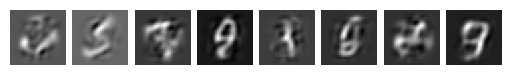

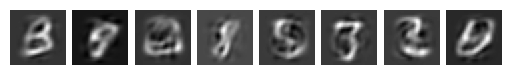

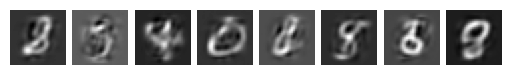

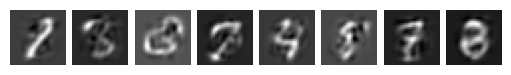

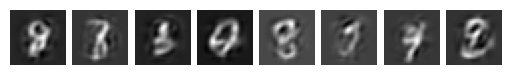

In [189]:
vae.eval()
with torch.no_grad():
    for i in range(5):
        ramdom_sample = torch.randn(8, z_dim)
        recon_batch = vae.dec(ramdom_sample)
        fig = show_image_grid(recon_batch.view(-1, 28, 28))
        plt.show()
    

## T-SNE
t-SNE embeds high-dimensional data, 32 in this case, into a space of two or three dimensions, which can then be visualized in a scatter plot.

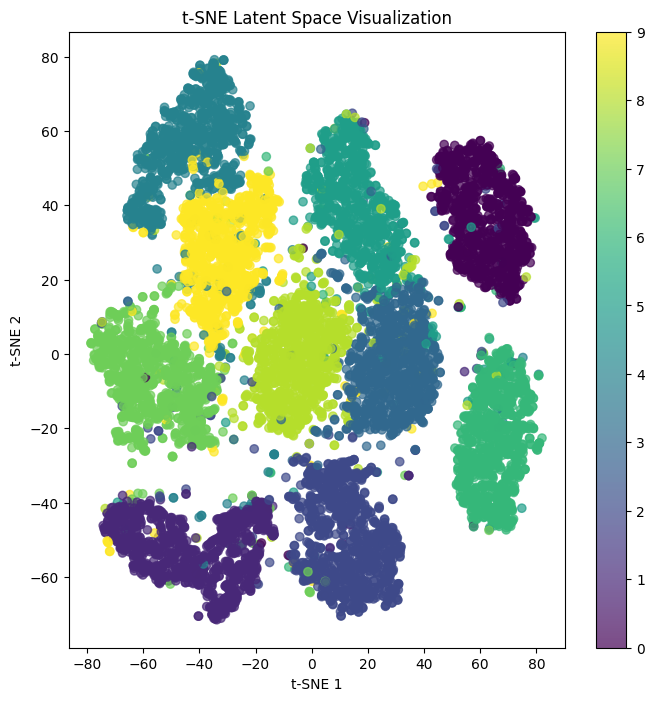

In [190]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Pass your test data through the encoder to get latent vectors
latent_vectors = []
labels = []

for x, y in test_loader:
    mu, logvar = vae.enc(x.view(-1, input_dim))
    latent_vectors.append(mu.detach().numpy())
    labels.append(y.numpy())

latent_vectors = np.concatenate(latent_vectors)
labels = np.concatenate(labels)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2)
latent_2d = tsne.fit_transform(latent_vectors)

# Scatter plot the 2D latent space with t-SNE
plt.figure(figsize=(8, 8))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("t-SNE Latent Space Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

